# Day014
## Subplots
### 參考資料: [Multiple Subplots](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 忽略Seaborn最近出現的futureWarning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-white')

### 1. `plt.axes()`: Subplot by hand
預設會創造一個填滿figure的axes object，或者可以輸入一個含有figure內座標的list`[left, bottom, width, height]`，創造一個左下為0右上為1的小坐標系 。

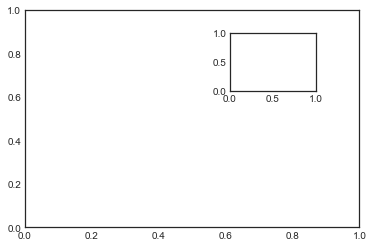

In [2]:
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.6, 0.6, 0.2, 0.2]) # axes at (60%, 60%) with 20% height and width of figure

上面程式的物件導向版本為`fig.add_axes()`，下面的例子利用給定的座標位置創造兩個中間黏在一起的座標軸

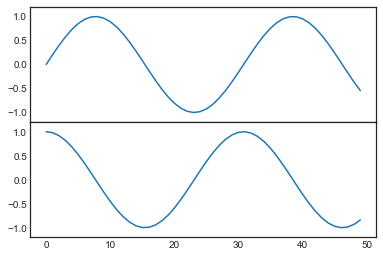

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels = [], ylim = [-1.2, 1.2]) # Upper fig
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim = [-1.2, 1.2]) # Lower fig

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### 2. `plt.subplot()`: Simple grid of subplots
創造一個在Grid中的subplot，需要指定(row, col, pos)

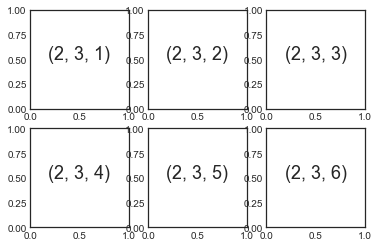

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

可以看到上面的圖有點重疊到了，可以利用`plt.subplots_adjust(hspace=0.4, wspace=0.4)`來調整子圖間的空白。

其中的0.4代表subplot大小的40%

上面程式的物件導向版本為`fig.add_subplot()`

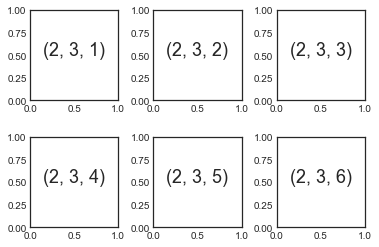

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

### 3. `plt.subplots()`: The Whole Grid in One GO
方法2在需要創造大量格子的時候會顯得很麻煩(想想那個for loop)，尤其是當我們不想要顯示格子間的x, y軸時更是如此。
使用`plt.subplots()` (注意結尾的s)就能把方法2簡化成一行程式碼，並且將整個Grid回傳成一個NumPy array，它的argument為(row#, col#)，還有額外的`sharex`跟`sharey`來指定不同軸間的關係。

下面就來創造一個$2 \times 3$的Grid，且同一行共享y軸，同一列共享x軸。

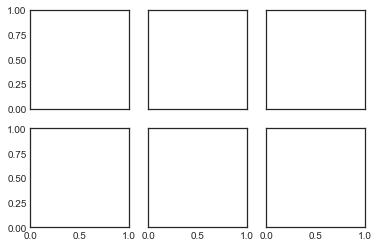

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

上面使用了`sharex`跟`sharey`來把中間的軸都消除掉，讓圖看起來乾淨一點，且因為回傳的是NumPy array，所以較方便使用indexing notation來指定想要的subplot。

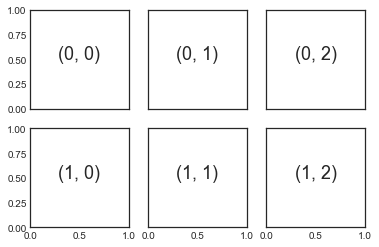

In [7]:
# Axes are in 2D array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

> 比起`.subplot()`，`.subplots`與Python的0-base indexing較有一致性。

### 4. `plt.GridSpec()`: More Complicated Arrangements
`plt.GridSpec()` object不會創造plot，它只是一個面對`plt.subplot()`時較方便的介面。

In [8]:
# Create a grid object
grid = plt.GridSpec(2, 3, hspace=0.3, wspace=0.4)

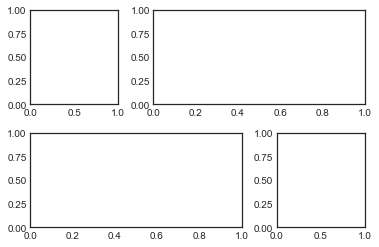

In [9]:
# From grid we can specify subplot locations and extents using the familiary Python slicing syntax
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

#### 綜合以上我們就能有很多變化了!

#### 以下就是個例子

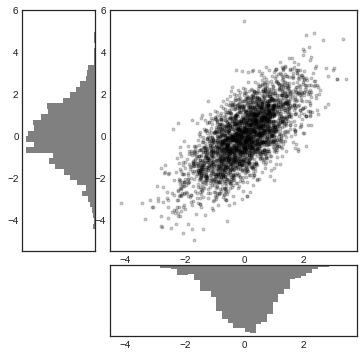

In [10]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey = main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex = main_ax)

# Scatter point on main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Histogram on attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

因為上面的圖太常用到了，所以seaborn可以直接畫出來，詳見[`sns.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

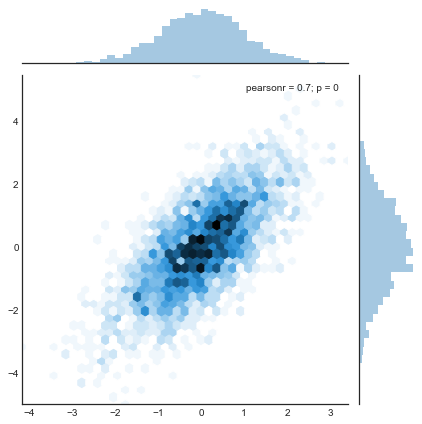

In [11]:
g = sns.jointplot(x, y, kind='hex')

## 實際範例 - 將塞太多組別的圖，拆成多張檢視

In [12]:
plt.style.use('ggplot')
# 設定 data_path
dir_data = '../Data/Part01/'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))

app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../Data/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Translate DAYS_BIRTH to positive
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [14]:
# 根據年齡分成不同組別 (年齡區間 還款與否)

# subset
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
# day-age to year-age
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
# continuous to discrete
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'],
                                 bins = np.linspace(20, 70, num = 11)) # 自 20 到 70 歲，切 11 個點 (得到 10 組)
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


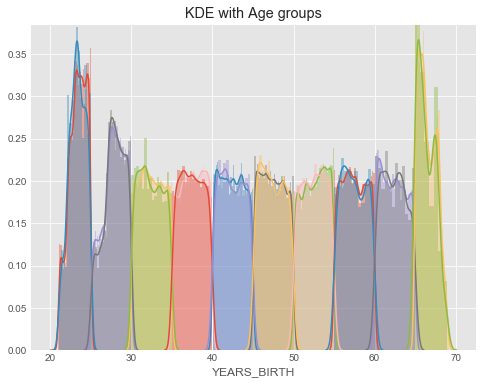

In [15]:
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())

plt.figure(figsize=(8, 6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
plt.title('KDE with Age groups')
plt.show()

### Subplots

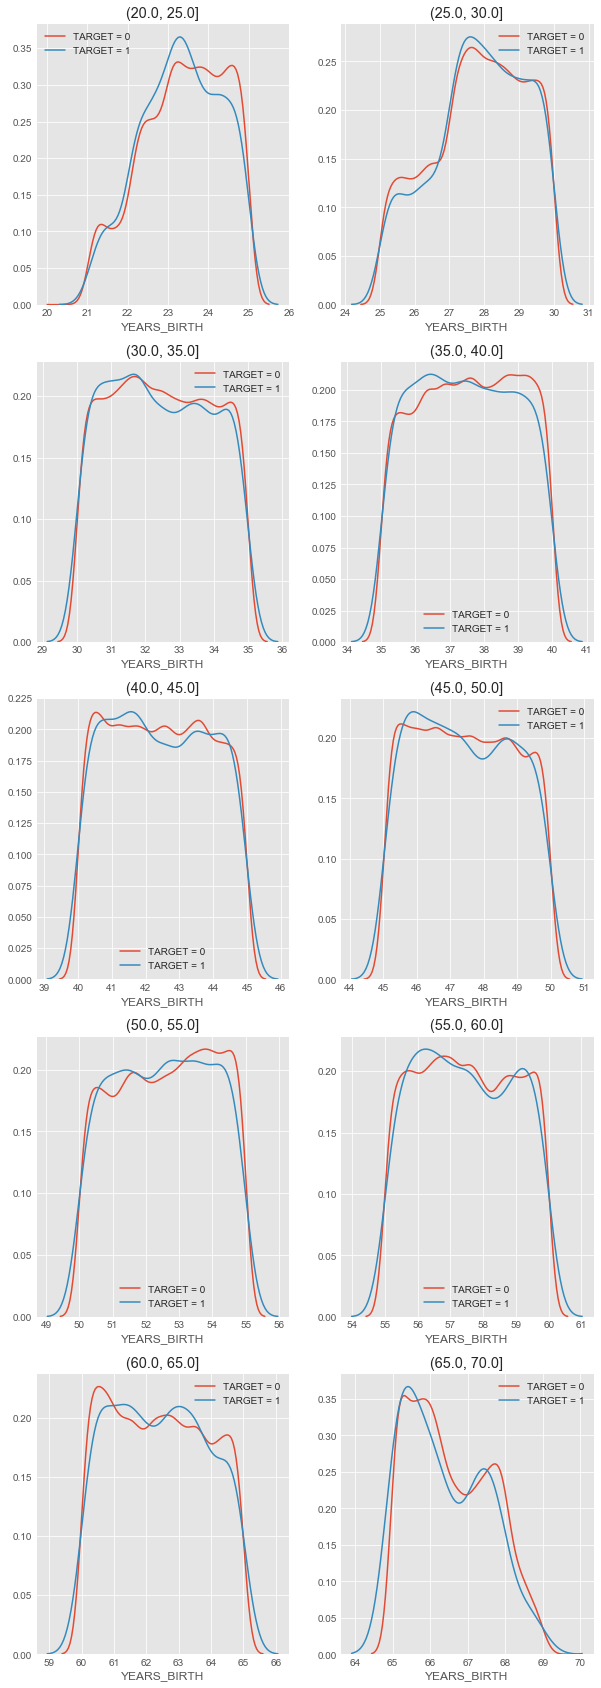

In [16]:
nrows = 5
ncols = 2

plt.figure(figsize=(10, 30))
for i in range(len(year_group_sorted)):
    plt.subplot(nrows, ncols, i + 1)
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], 
                 label = "TARGET = 0", hist = False)
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], 
                 label = "TARGET = 1", hist = False)
    plt.title(str(year_group_sorted[i]))
plt.show()

## 作業
### 請根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

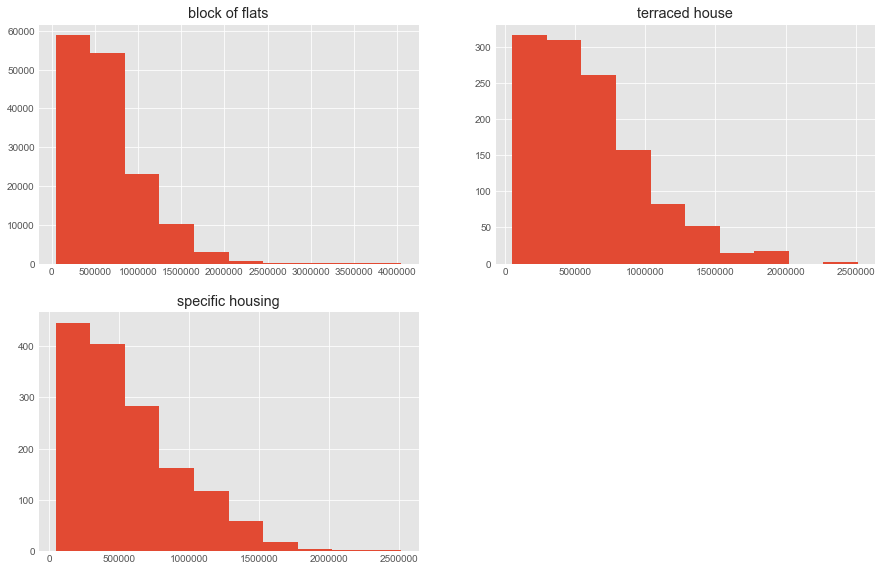

In [17]:
"""
Your Code Here
"""
unique_house_type = app_train['HOUSETYPE_MODE'].unique()
unique_house_type = unique_house_type[~pd.isna(unique_house_type)]

nrows = len(unique_house_type)
if nrows % 2 == 0:
    ncols = nrows // 2
else:
    ncols = nrows // 2 + 1

plt.figure(figsize=(15,15))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    app_train.loc[app_train['HOUSETYPE_MODE'] == unique_house_type[i] , 'AMT_CREDIT'].hist()
    
    plt.title(str(unique_house_type[i]))
plt.show()    